In [15]:
import csv
f1 = open ("C:\Users\Anmol Mishra\CC3DWorkspace\Phase 5\With migration\Jcc = 10\Triangle\Demo_cc3d_06_28_2016_14_29_51\data.csv" , "rb")
data = csv.reader(f1)

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [17]:
newdata = []
for line in data:
    newdata.append(line)
finalVolume = int(newdata[-1][3])

In [18]:
for i in range(len(newdata)):
    if (int(newdata[i][3])>finalVolume):
        finalVolume = int(newdata[i][3])

In [19]:
tend = 0
for i in newdata:
    if (int(i[3]) == finalVolume) :
        tend = int(i[0])
        break

In [20]:
tend = 4000

In [21]:
freespace = []
for i in range(len(newdata)):
    if (int(newdata[i][0]) != int(newdata[i-1][0])):
        freespace.append(finalVolume - int(newdata[i][3]))

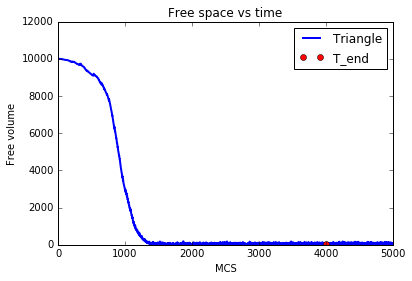

In [22]:
plt.plot(freespace , linewidth = 2 , label = "Triangle")
plt.plot( [tend], freespace[tend] , 'ro' , label = "T_end")
plt.title("Free space vs time")
plt.xlabel("MCS")
plt.ylabel("Free volume")
plt.legend()
plt.savefig("Free space Triangle")

In [23]:
noofcells = []
count =0
for i in range(len(newdata)):
    if (int(newdata[i][0]) == int(newdata[i-1][0])):
        count = count+1
    else :
        noofcells.append(count+1)
        count=0

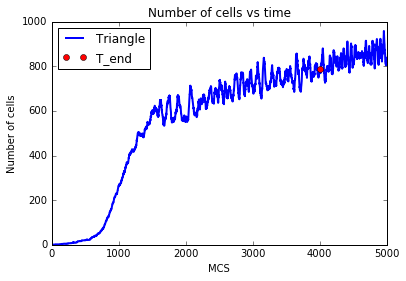

In [24]:
plt.plot( noofcells, linewidth = 2 , label = "Triangle")
plt.plot( [tend], noofcells[tend] , 'ro' , label = "T_end")
plt.title("Number of cells vs time")
plt.xlabel("MCS")
plt.ylabel("Number of cells")
plt.legend( loc = 2)
plt.savefig("Number of Cells Triangle")

In [25]:
volume = []
varvolume = []
for i in range(len(newdata)):
    if (int(newdata[i][0]) == int(newdata[i-1][0]) and i != 0):
        volume.append(int(newdata[i-1][2]))
    else :
        volume.append(int(newdata[i-1][2]))
        npvolume = np.array(volume)
        varvolume.append(npvolume.std())
        volume = []
npvolume = np.array(volume)
varvolume.append(npvolume.std())
del varvolume[0]

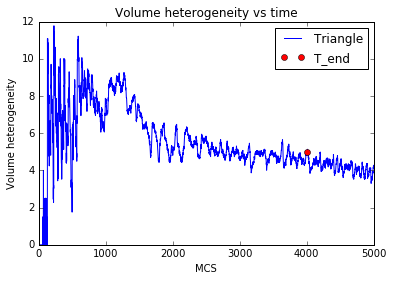

In [26]:
plt.plot(varvolume, label = "Triangle")
plt.plot( [tend], varvolume[tend] , 'ro' , label = "T_end")
plt.title("Volume heterogeneity vs time")
plt.xlabel("MCS")
plt.ylabel("Volume heterogeneity")
plt.legend(loc = 0)
plt.savefig("Volume Heterogeneity Triangle")

In [27]:
area = []
vararea = []
for i in range(len(newdata)):
    if (int(newdata[i][0]) == int(newdata[i-1][0]) and i != 0):
        area.append(float(newdata[i-1][4]))
    else :
        area.append(float(newdata[i-1][4]))
        nparea = np.array(area)
        vararea.append(nparea.std())
        area = []
nparea = np.array(area)
vararea.append(nparea.std())
del vararea[0]

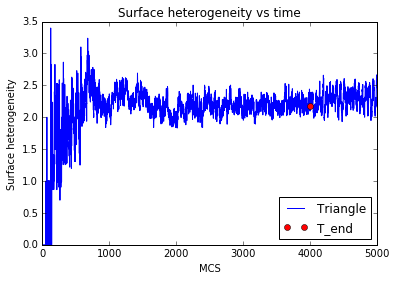

In [28]:
plt.plot(vararea, label = "Triangle")
plt.plot( [tend], vararea[tend] , 'ro' , label = "T_end")
plt.title("Surface heterogeneity vs time")
plt.xlabel("MCS")
plt.ylabel("Surface heterogeneity")
plt.legend(loc = 4)
plt.savefig("Surface Heterogeneity Triangle")